# To Do:
- find the names of the covariates

In [2]:
import pandas as pd
import numpy as np
from algorithms import *
from eda import *

# Data Preprocessing:
- Load and clean the data.
- Normalize the features if necessary.
- Apply appropriate preprocessing suitable for classification problem.
- Split the data into training and test sets.

In [3]:
# load data
col_names = [ "ID", "Diagnosis",  
    "Rad_M", "Tex_M", "Peri_M", "Area_M", "Smth_M", 
    "Comp_M", "Conc_M", "Concp_M", "Sym_M", "Frac_M",
    "Rad_SE", "Tex_SE", "Peri_SE", "Area_SE", "Smth_SE", 
    "Comp_SE", "Conc_SE", "Concp_SE", "Sym_SE", "Frac_SE",
    "Rad_W", "Tex_W", "Peri_W", "Area_W", "Smth_W", 
    "Comp_W", "Conc_W", "Concp_W", "Sym_W", "Frac_W"
]
diabetes_data = pd.read_csv("./data/wdbc.data", header=None, names=col_names)
diabetes_data.head()

,ID,Diagnosis,Rad_M,Tex_M,Peri_M,Area_M,Smth_M,Comp_M,Conc_M,Concp_M,...,Rad_W,Tex_W,Peri_W,Area_W,Smth_W,Comp_W,Conc_W,Concp_W,Sym_W,Frac_W
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **Defining column names since they are unnamed in the .data file**:

- **`ID`**: Unique identifier for each sample.
- **`Diagnosis`**: Binary classification of the tumor (`M` = Malignant, `B` = Benign).

#### **Mean Feature Values (Average Measurements)**
- **`Rad_M`**: Mean radius (average distance from center to perimeter).
- **`Tex_M`**: Mean texture (standard deviation of gray-scale values).
- **`Peri_M`**: Mean perimeter.
- **`Area_M`**: Mean area.
- **`Smth_M`**: Mean smoothness (local variation in radius).
- **`Comp_M`**: Mean compactness (`(perimeter² / area) - 1.0`).
- **`Conc_M`**: Mean concavity (severity of concave portions).
- **`Concp_M`**: Mean concave points (number of concave portions).
- **`Sym_M`**: Mean symmetry.
- **`Frac_M`**: Mean fractal dimension ("coastline approximation" - 1).

#### **Standard Error (SE) Values**
- **`Rad_SE`**: SE of radius.
- **`Tex_SE`**: SE of texture.
- **`Peri_SE`**: SE of perimeter.
- **`Area_SE`**: SE of area.
- **`Smth_SE`**: SE of smoothness.
- **`Comp_SE`**: SE of compactness.
- **`Conc_SE`**: SE of concavity.
- **`Concp_SE`**: SE of concave points.
- **`Sym_SE`**: SE of symmetry.
- **`Frac_SE`**: SE of fractal dimension.

#### **Worst (Largest) Values**
- **`Rad_W`**: Worst (largest) radius.
- **`Tex_W`**: Worst texture.
- **`Peri_W`**: Worst perimeter.
- **`Area_W`**: Worst area.
- **`Smth_W`**: Worst smoothness.
- **`Comp_W`**: Worst compactness.
- **`Conc_W`**: Worst concavity.
- **`Concp_W`**: Worst concave points.
- **`Sym_W`**: Worst symmetry.
- **`Frac_W`**: Worst fractal dimension.

In [4]:
# inspect the data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         569 non-null    int64  
 1   Diagnosis  569 non-null    object 
 2   Rad_M      569 non-null    float64
 3   Tex_M      569 non-null    float64
 4   Peri_M     569 non-null    float64
 5   Area_M     569 non-null    float64
 6   Smth_M     569 non-null    float64
 7   Comp_M     569 non-null    float64
 8   Conc_M     569 non-null    float64
 9   Concp_M    569 non-null    float64
 10  Sym_M      569 non-null    float64
 11  Frac_M     569 non-null    float64
 12  Rad_SE     569 non-null    float64
 13  Tex_SE     569 non-null    float64
 14  Peri_SE    569 non-null    float64
 15  Area_SE    569 non-null    float64
 16  Smth_SE    569 non-null    float64
 17  Comp_SE    569 non-null    float64
 18  Conc_SE    569 non-null    float64
 19  Concp_SE   569 non-null    float64
 20  Sym_SE    

## Inspection Observations
- **Data Missingness**: There is no data missing in any of the rows or columns.

- **Data Types**:
    - integers: `ID`
    - string: `Diagnosis`
    - real numbers/floats: `Rad_M`, `Tex_M`, `Peri_M`, `Area_M`, `Smth_M`, `Comp_M`, `Conc_M`, `Concp_M`, `Sym_M`, `Frac_M`, `Rad_SE`, `Tex_SE`, `Peri_SE`, `Area_SE`, `Smth_SE`,  `Comp_SE`, `Conc_SE`, `Concp_SE`, `Sym_SE`, `Frac_SE`, `Rad_W`, `Tex_W`, `Peri_W`, `Area_W`, `Smth_W`,  `Comp_W`, `Conc_W`, `Concp_W`, `Sym_W`, `Frac_W`

In [5]:
# gather summary statistics
round(diabetes_data.describe().T, 1) # rounding for readibility

,count,mean,std,min,25%,50%,75%,max
ID,569.0,30371831.4,125020585.6,8670.0,869218.0,906024.0,8813129.0,911320502.0
Rad_M,569.0,14.1,3.5,7.0,11.7,13.4,15.8,28.1
Tex_M,569.0,19.3,4.3,9.7,16.2,18.8,21.8,39.3
Peri_M,569.0,92.0,24.3,43.8,75.2,86.2,104.1,188.5
Area_M,569.0,654.9,351.9,143.5,420.3,551.1,782.7,2501.0
Smth_M,569.0,0.1,0.0,0.1,0.1,0.1,0.1,0.2
Comp_M,569.0,0.1,0.1,0.0,0.1,0.1,0.1,0.3
Conc_M,569.0,0.1,0.1,0.0,0.0,0.1,0.1,0.4
Concp_M,569.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2
Sym_M,569.0,0.2,0.0,0.1,0.2,0.2,0.2,0.3


In [6]:
# calculate frequency distributions of categorical variables
print(diabetes_data['Diagnosis'].value_counts())

Diagnosis
B    357
M    212
Name: count, dtype: int64


## Summary Statistics Observations:

- **Skewed Distributions**: `Rad_M`,. `Peri_M`, `Area_M`, `Rad_SE`, `Tex_SE`, `Peri_SE`, `Area_SE`,`Rad_W`, `Tex_W`, `Peri_W`, `Area_W`, `Comp_W`, `Conc_W`
    - Reasoning: For all the columns listed there is a wider range between 75% and max compared to the other quartiles indicating a heavy right tail. For columns `Area_SE` and `Area_W` there is also noticeable disimmilarity amongst the central tendencies mean and median, although the mean does not fall between 3rd quartile and max value indicating that if there is a right skew, it is likely moderate, not high. A skew test can confirm if this is true and statistically significant. There appears to be no left skewed variables in this dataset.

- **Zero Abundance**: None but ** there are variables to keep an eye on
    - Reasoning: While there are not any variables that are zero-inflated (majority 0 values) there are variables whose scaling is noticeably small and very close to 0: `Smth_SE`, `Comp_SE`, `Conc_SE`, `Concp_SE`, `Sym_SE`, `Frac_SE`

- **Standard Deviation**: Because standard deviation is sensitive to the scale and range of the data, `correlation of variation` may be better to compare dispersion across all the variables since it is a unitless metric.

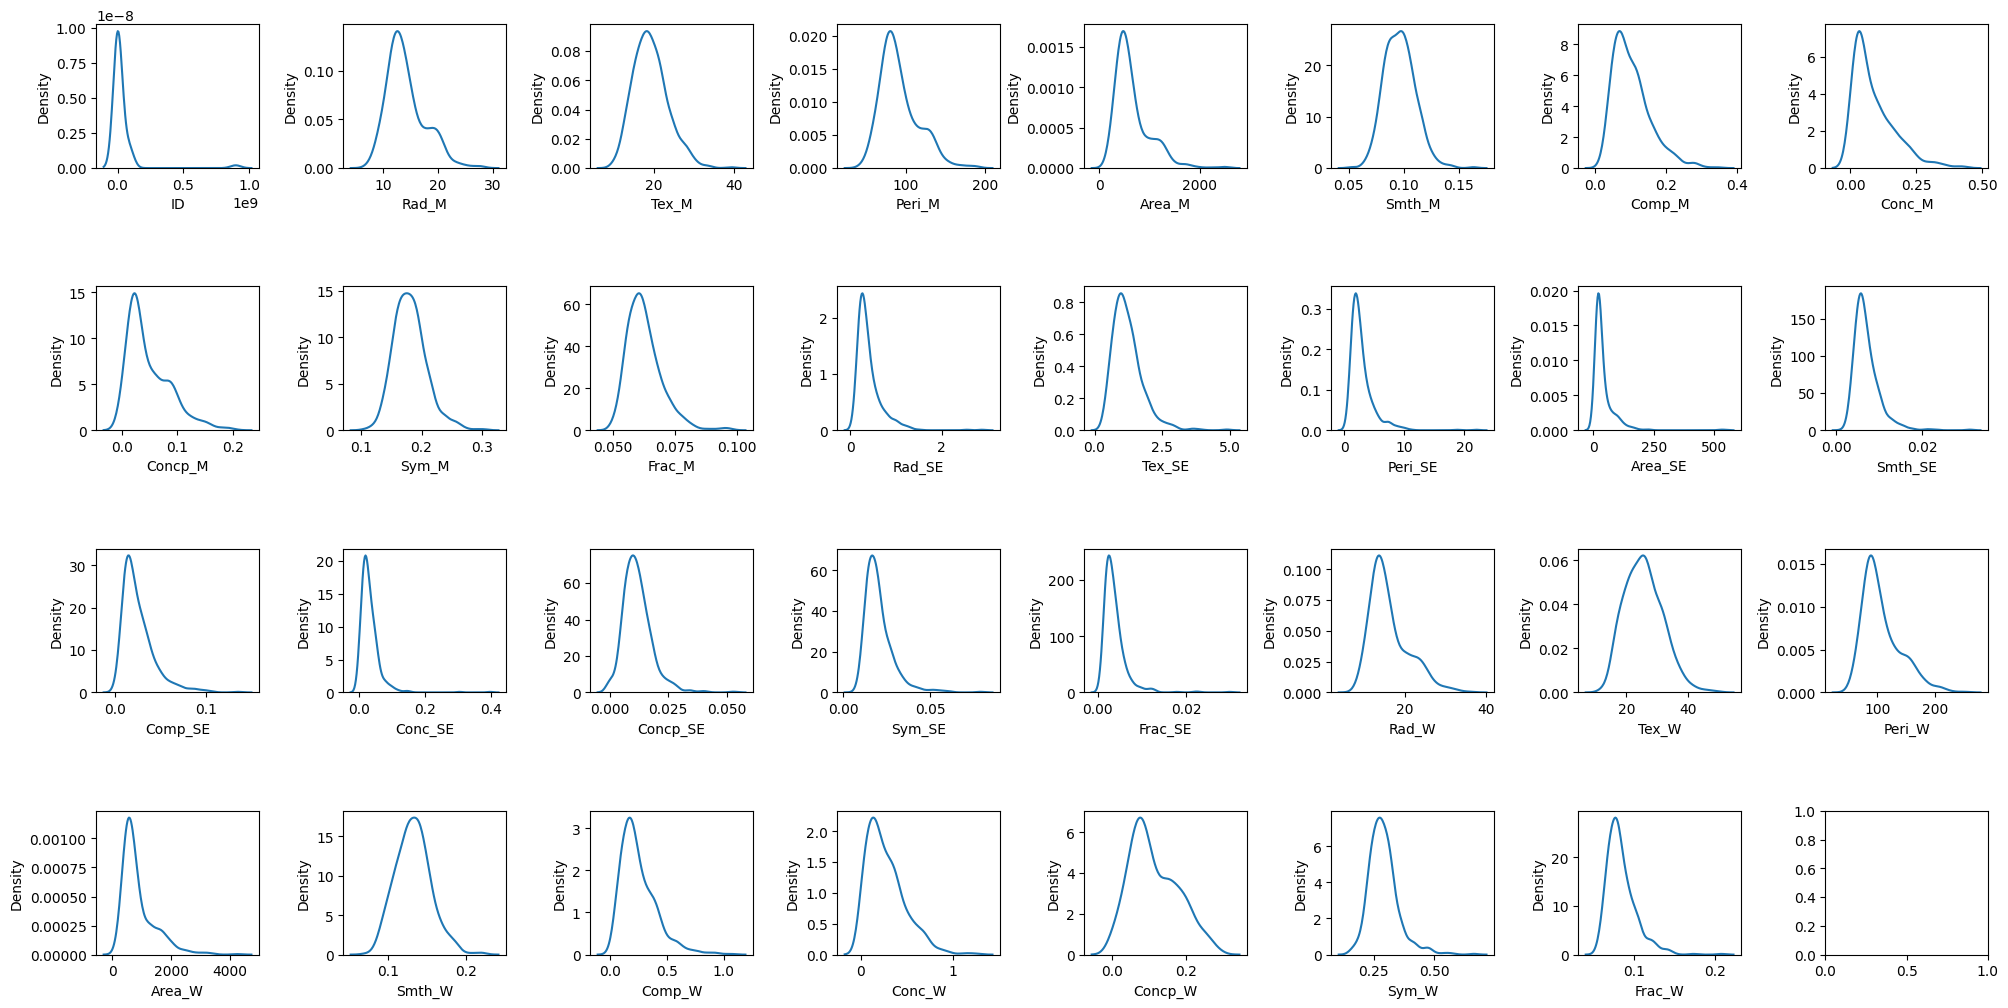

In [7]:
# visualize distributions to assess skew, kurtosis and overall distribution shape
diabetes_X_data = diabetes_data.drop(columns=['Diagnosis']) # numeric/covariates only
sub_kde_plots(diabetes_X_data, 4, 8)

In [8]:
# analyze distribution shape to determine which variables are non-normal
dist_shape(diabetes_X_data)

,skewness,kurtosis
ID,6.473752,42.193194
Rad_M,0.942380,0.845522
Tex_M,0.650450,0.758319
Peri_M,0.990650,0.972214
Area_M,1.645732,3.652303
Smth_M,0.456324,0.855975
Comp_M,1.190123,1.650130
Conc_M,1.401180,1.998638
Concp_M,1.171180,1.066556
Sym_M,0.725609,1.287933


## EDA Visualization Observations:

- **Highly Assymetric (Right)**: `Area_M`, `Comp_M`, `Conc_M`, `Concp_M`, `Frac_M`, `Rad_SE`, `Tex_SE`, `Peri_SE`, `Area_SE`, `Smth_SE`, `Comp_SE`, `Conc_SE`, `Concp_SE`, `Sym_SE`, `Frac_SE`, `Rad_W`, `Peri_W`, `Area_W`, `Comp_W`, `Conc_W`, `Sym_W`, `Frac_W`
- **Moderately Assymetric (Right)**: `Rad_M`, `Tex_M`, `Peri_M`, `Sym_M`
- **Leptokurtic**: `Area_M`, `Frac_M`, `Rad_SE`, `Tex_SE`, `Peri_SE`, `Area_SE`, `Smth_SE`, `Comp_SE`, `Conc_SE`, `Concp_SE`, `Sym_SE`, `Frac_SE`, `Area_W`, `Comp_W`, `Sym_W`, `Frac_W` (threshold of 3)

There are only 4 variables (`Smth_M`, `Tex_W`, `Smth_W`, `Concp_W`) that satisfy all the the conditions of normality (mesokurtic, unimodal and symmetric) so the rest of the variables will need to normalized. 

# Data Cleaning

The order in which we handles issues in our data matters. While we know that normalization is a necessary step, because our data can have other issues it is best to handle those cases first so that standardization does not distort the data further. We also should look for zero abundance between each covariate and the target variable before looking for collinearity amongst the remaining features since that can distort the VIF calculation.

# Implement Gaussian NaiveBayes (GNB) and Gaussian Discriminant Analysis (GDA):
1. Use shared co-variance as well as class specific co-variance for GDA
2. Implement the fit and predict functions.
3. Train the model on the training set.
4. Evaluate the model on the test set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_pdf(x, mean, covariance):
    n = len(mean)
    coeff = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(covariance) ** 0.5)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(covariance)), (x - mean))
    return coeff * np.exp(exponent)

class GaussianDiscriminantAnalysis:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.means = np.zeros((len(self.classes), X.shape[1]))
        self.covariances = []

        for i, c in enumerate(self.classes):
            class_data = X[y == c]
            self.class_priors[i] = len(class_data) / len(X)
            self.means[i] = np.mean(class_data, axis=0)
            self.covariances.append(np.cov(class_data, rowvar=False))

    def predict(self, X):
        predictions = []

        for x in X:
            class_probs = []

            for i, c in enumerate(self.classes):
                prior = np.log(self.class_priors[i])
                likelihood = np.log(gaussian_pdf(x, self.means[i], self.covariances[i]))
                class_probs.append(prior + likelihood)

            predictions.append(self.classes[np.argmax(class_probs)])

        return np.array(predictions)

    def plot_distribution(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', label='Data Points')

        for i, c in enumerate(self.classes):
            plt.scatter(self.means[i, 0], self.means[i, 1], c='red', marker='x', s=100, label=f'Mean (Class {c})')

            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

            # Calculate the probability density for each point in the meshgrid
            xy_points = np.column_stack((xx.ravel(), yy.ravel()))
            Z = np.array([gaussian_pdf(xy, self.means[i], self.covariances[i]) for xy in xy_points])
            Z = Z.reshape(xx.shape)

            # Use brighter color for class 0
            contour_color = 'blue' if i == 0 else 'red'

            plt.contourf(xx, yy, Z, levels=10, cmap=plt.cm.Blues if i == 0 else plt.cm.Reds, alpha=0.5)

        # Plot the decision boundary
        Z0 = np.array([gaussian_pdf(xy, self.means[0], self.covariances[0]) for xy in xy_points])
        Z1 = np.array([gaussian_pdf(xy, self.means[1], self.covariances[1]) for xy in xy_points])
        Z = np.log(Z1) - np.log(Z0) + np.log(self.class_priors[1]) - np.log(self.class_priors[0])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Gaussian Discriminant Analysis with Class Distributions')

        # Create a legend manually
        legend_labels = [f'Class {c} Distribution' for c in self.classes]
        plt.legend(legend_labels, loc='upper right')

        plt.show()

# Implement Logistic Regression:
1. Derive the Logistic Regression equations and implement the fit function using gradient descent.
2. Train the model on the training set.
3. Evaluate the model on the test set.

# Implement Perceptron:
1. Derive the Perceptron learning rule and implement the algorithm.
2. Train the model on the training set.
3. Evaluate the model on the test set.

# Comparison and Analysis:
1. Compare your solutions with standard APIs in terms of model parameters and appropriate metrics (e.g., accuracy, precision, recall, F1 score).
2. Analyze the strengths and weaknesses of each algorithm.
3. Discuss linear separability. How did you check if your data is linearly separable.?